In [1]:
import UWGeodynamics as GEO

In [2]:
u = GEO.UnitRegistry

In [3]:
velocity = 1.0 * u.centimeter / u.year
model_height = 100. * u.kilometer
viscosityRef = 1e20 * u.pascal * u.second

KL = model_height
Kt = KL / velocity
KM = viscosityRef * KL * Kt

GEO.sca.scaling["[length]"] = KL
GEO.sca.scaling["[time]"] = Kt
GEO.sca.scaling["[mass]"]= KM

In [4]:
Model = GEO.Model(elementRes=(64, 16), 
                  minCoord=(-200. * u.kilometer,   0. * u.kilometer), 
                  maxCoord=(200. * u.kilometer,  100. * u.kilometer),  
                  gravity=(0.0, -10.0 * u.meter / u.second**2))

In [5]:
airLayer = Model.add_material(name="Air", shape=GEO.shapes.Layer(top=Model.top, bottom = 80. * u.kilometer))
viscoPlasticLayer = Model.add_material(name="ViscoPlastic", shape=GEO.shapes.Layer(top=airLayer.bottom, bottom=10. * u.kilometer))
underLayer = Model.add_material(name="Under", shape=GEO.shapes.Layer(top=viscoPlasticLayer.bottom, bottom=Model.bottom))

In [6]:
airLayer.density = 0.01 * u.kilogram / u.metre**3
viscoPlasticLayer.density = 0.3 * u.kilogram / u.metre**3
underLayer.density = 3.0 * u.kilogram / u.metre**3

In [7]:
airLayer.viscosity = 1e18  * u.pascal * u.second
viscoPlasticLayer.viscosity = 1e20  * u.pascal * u.second
underLayer.viscosity = 5.0e4  * u.pascal * u.second

In [8]:
viscoPlasticLayer.plasticity  = GEO.DruckerPrager(cohesion=0.32 * u.megapascal, cohesionAfterSoftening=0.24 * u.megapascal, frictionCoefficient=0.3, frictionAfterSoftening=0.3, epsilon1=0.5, epsilon2=1.0)

In [9]:
import numpy as np

def gaussian(xx, centre, width):
    return ( np.exp( -(xx - centre)**2 / width ))

maxDamage = 0.7
Model.plasticStrain.data[:] = maxDamage * np.random.rand(*Model.plasticStrain.data.shape[:])
Model.plasticStrain.data[:,0] *= gaussian(Model.swarm.particleCoordinates.data[:,0], 0.0, GEO.nd(2.5 * u.kilometer))
Model.plasticStrain.data[:,0] *= gaussian(Model.swarm.particleCoordinates.data[:,1], 0.0, GEO.nd(2.5 * u.kilometer))

In [10]:
velocityBCs = Model.set_velocityBCs(left=[-1.0 * u.centimeter / u.hour, None], right=[1.0 * u.centimeter / u.hour, None], top=[None, None], bottom=[None, 0.])


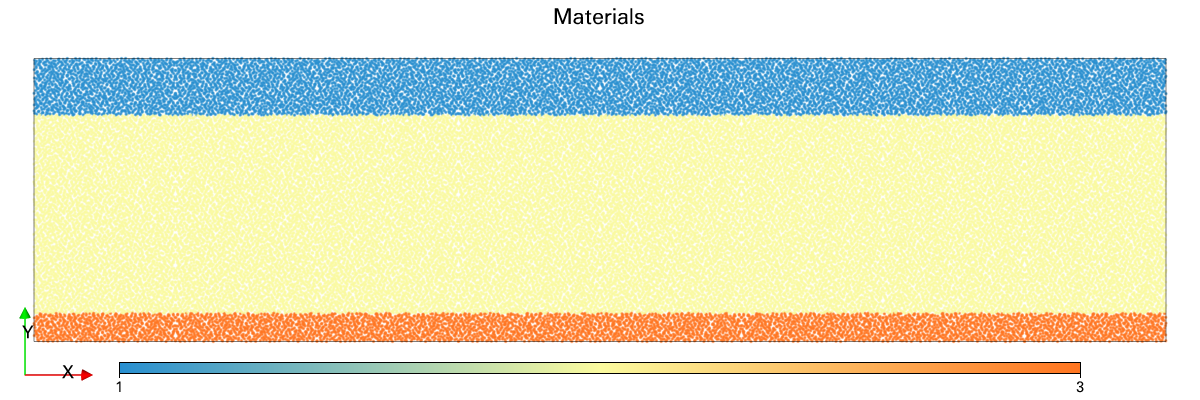

In [11]:
Fig = Model.plot.material(projected=False, figsize=(1200,400), fn_size=4.0)